Канал 4


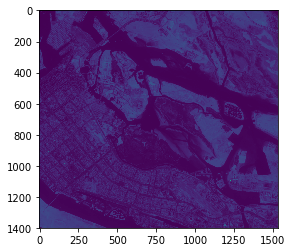

Канал 8


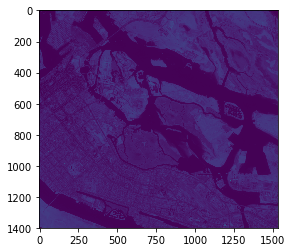

Изображение с примененным NDVI


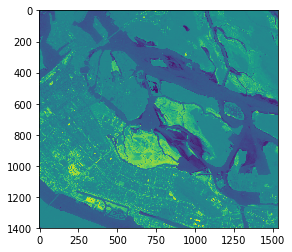

Фиолетовый - вода
Желтый - дома, дороги, снег
Зеленый - зеленые массивы


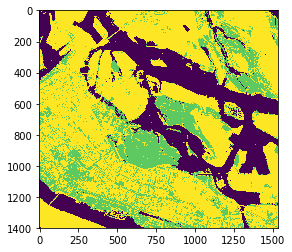

In [11]:
import rasterio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt
%matplotlib inline

projectFilePath = '/Users/mikhail/project/changeDetection/'

dataset = rasterio.open(projectFilePath + 'AbuDabi_2016_Sant2/B4.TIF')
band4 = dataset.read(1)
print("Канал 4")
show(band4)

dataset = rasterio.open(projectFilePath + 'AbuDabi_2016_Sant2/B8.TIF')
band8 = dataset.read(1)
print("Канал 8")
show(band8)

np.seterr(divide = 'ignore', invalid = 'ignore')
ndvi2016Year = (band8.astype(float) - band4.astype(float)) / (band8 + band4)
print("Изображение с примененным NDVI")
show(ndvi2016Year)

sz = ndvi2016Year.shape
rows = sz[0]
cols = sz[1]
for i in range(rows):
    for j in range(cols):
        if (ndvi2016Year[i][j] >= -0.75 and ndvi2016Year[i][j] <= -0.15):
            ndvi2016Year[i][j] = -1
        elif (ndvi2016Year[i][j]>= -0.1 and ndvi2016Year[i][j] <= 0.1):
            ndvi2016Year[i][j] = 1
        else:
            ndvi2016Year[i][j] = 0.5
print("Фиолетовый - вода")
print("Желтый - дома, дороги, снег")
print("Зеленый - зеленые массивы")

show(ndvi2016Year)

Канал 4


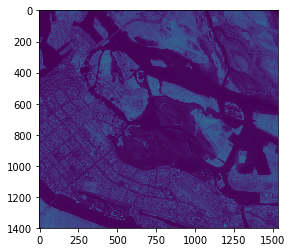

Канал 8


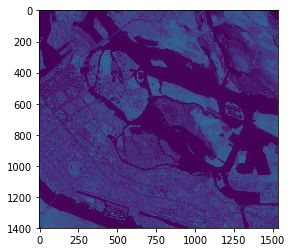

Изображение с примененным NDVI


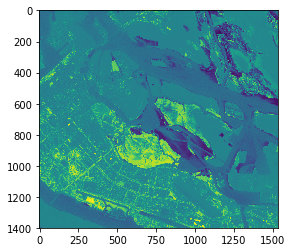

Фиолетовый - вода
Желтый - дома, дороги, снег
Зеленый - зеленые массивы


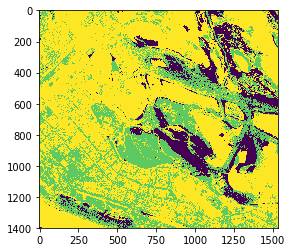

In [12]:
dataset = rasterio.open(projectFilePath + 'AbuDabi_2019_Sant2/B4.TIF')
band4 = dataset.read(1)
print("Канал 4")
show(band4)

dataset = rasterio.open(projectFilePath + 'AbuDabi_2019_Sant2/B8.TIF')
band8 = dataset.read(1)
print("Канал 8")
show(band8)

np.seterr(divide = 'ignore', invalid = 'ignore')
ndvi2019Year = (band8.astype(float) - band4.astype(float)) / (band8 + band4)
print("Изображение с примененным NDVI")
show(ndvi2019Year)

sz = ndvi2019Year.shape
rows = sz[0]
cols = sz[1]
for i in range(rows):
    for j in range(cols):
        if (ndvi2019Year[i][j] >= -0.75 and ndvi2019Year[i][j] <= -0.15):
            ndvi2019Year[i][j] = -1
        elif (ndvi2019Year[i][j]>= -0.1 and ndvi2019Year[i][j] <= 0.1):
            ndvi2019Year[i][j] = 1
        else:
            ndvi2019Year[i][j] = 0.5
print("Фиолетовый - вода")
print("Желтый - дома, дороги, снег")
print("Зеленый - зеленые массивы")

show(ndvi2019Year)

Абу-Даби в 2016г.


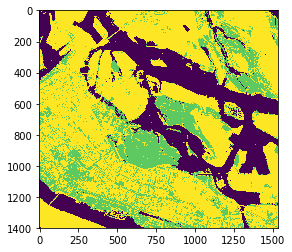

Абу-Даби в 2019г.


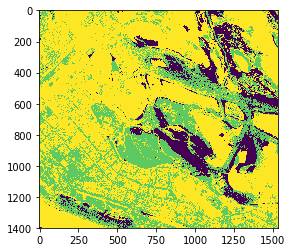

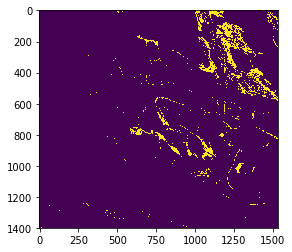

In [10]:
print("Абу-Даби в 2016г.")
show(ndvi2016Year)
print("Абу-Даби в 2019г.")
show(ndvi2019Year)
diffs = ndvi2016Year.copy()
for i in range(rows):
    for j in range(cols):
        if ndvi2019Year[i][j] == -1 and ndvi2016Year[i][j] != ndvi2019Year[i][j]:
            diffs[i][j] = 1
        else:
            diffs[i][j] = -1
show(diffs)